import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [12]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/52

make measure image

In [8]:
def_img = io.imread("image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 4\\9-27-43 PM\\11.13.2020 (4) 0324.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

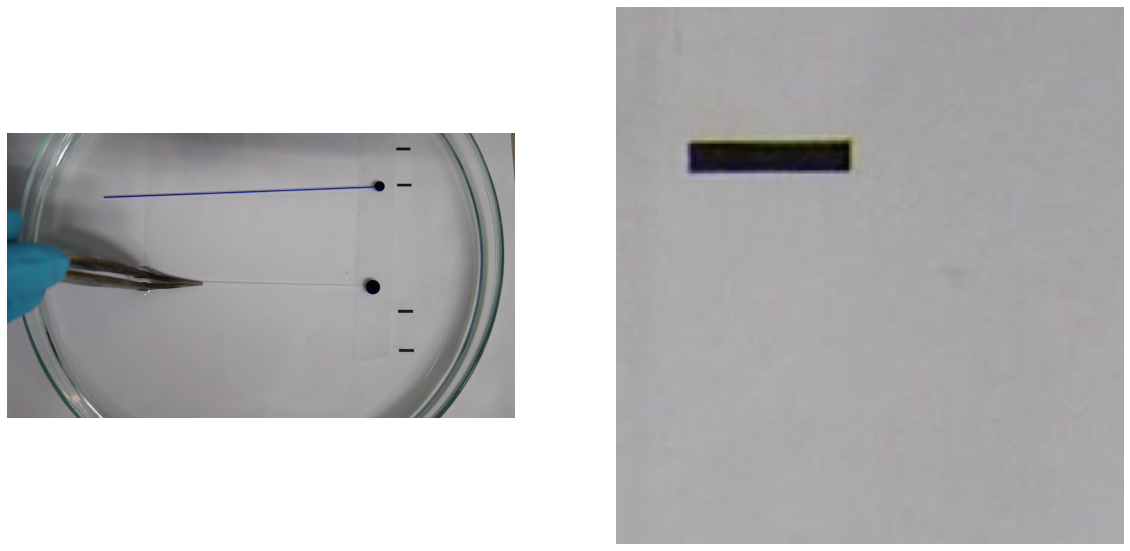

In [9]:
measure_im = crop(def_img, ((150, 750), (1450, 300), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

In [10]:
# plot_histogram(measure_im)

[51, 25]
[50, 77]


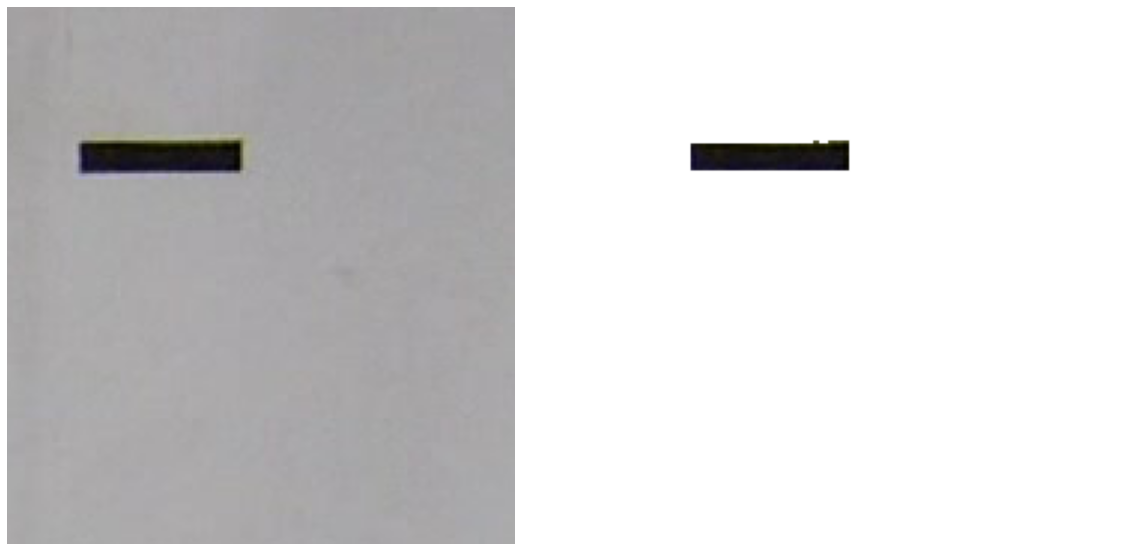

length of picture is  52.009614495783374 pixel


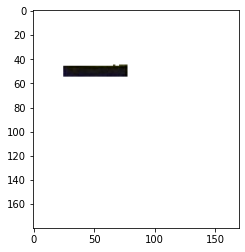

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

52 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 52


find definition length first picture

(1080, 1920, 3) (200, 720, 3)


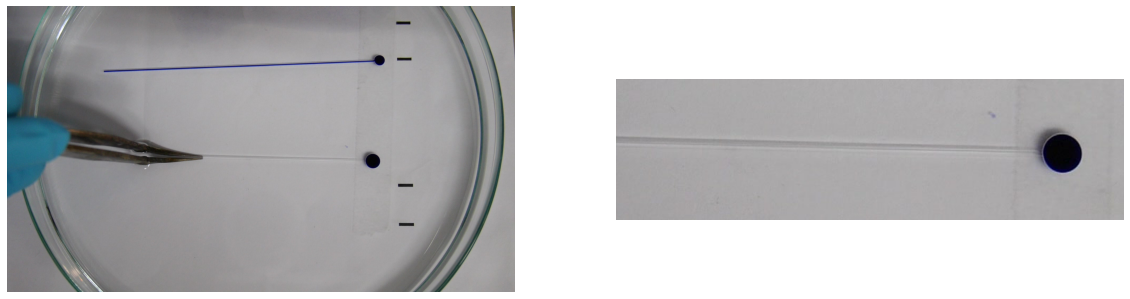

In [26]:
def_crop_im = crop(def_img, ((480, 400), (750, 450), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

In [27]:
# plot_histogram(def_crop_im)

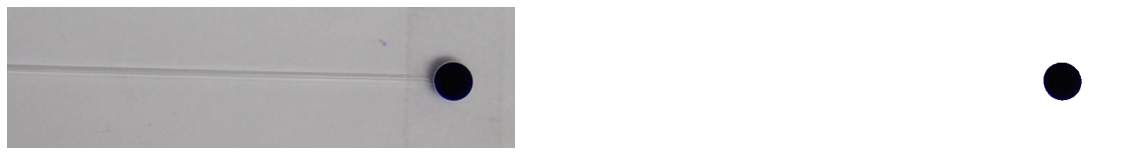

In [28]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[104, 606]
[106, 659]
ldef  53.03772242470448 pixel


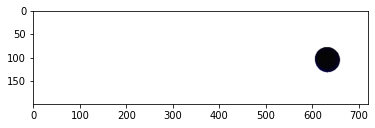

In [29]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0324 to 0390

In [30]:
number_of_picture = 324
thresh = 45
template1 = []
l_def = 53.03772242470448
for i in range(390-324+1):
    if(True) :   
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 4\\9-27-43 PM\\11.13.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((480, 400), (750, 450), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [31]:
print(template1)
print(len(template1))

[0, 7, 11, 18, 22, 29, 36, 43, 50, 56, 63, 70, 77, 83, 89, 96, 102, 109, 115, 122, 128, 134, 140, 147, 153, 159, 165, 172, 178, 183, 189, 195, 201, 207, 213, 219, 225, 231, 237, 242, 248, 253, 260, 265, 271, 276, 282, 287, 293, 299, 304, 310, 314, 319, 325, 330, 335, 340, 348, 352, 359, 363, 366, 371, 379, 384, 388]
67


find length on crop value 2 from 0391 to 1344

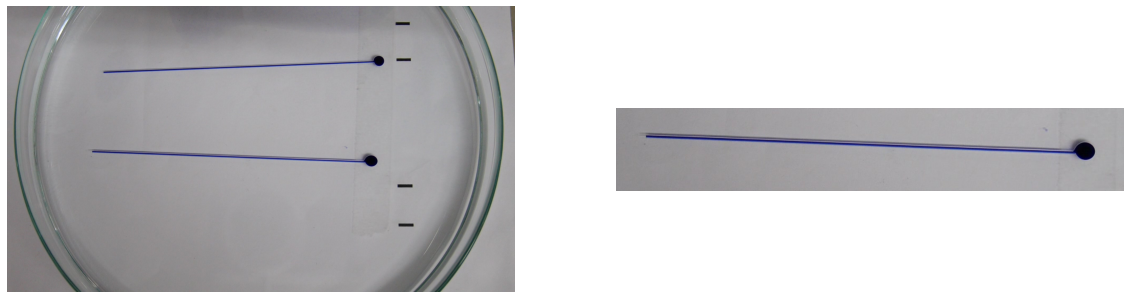

In [34]:
image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 4\\9-27-43 PM\\11.13.2020 (4) " + str(1344).zfill(4) + ".jpg" )
crop_image = crop(image, ((480, 400), (250, 450), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [35]:
number_of_picture = 391
thresh = 45
template2 = []
l_def = 53.03772242470448
for i in range(1344-391+1):
    if( True) :
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 4\\9-27-43 PM\\11.13.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((480, 400), (250, 450), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [36]:
print(template2)
print(len(template2))

[392, 397, 401, 408, 413, 420, 424, 427, 432, 438, 442, 448, 452, 457, 462, 466, 470, 476, 482, 486, 492, 494, 499, 504, 508, 513, 519, 523, 527, 530, 535, 540, 544, 548, 553, 557, 562, 566, 571, 575, 579, 583, 588, 593, 597, 602, 606, 610, 613, 617, 623, 628, 633, 636, 640, 645, 649, 654, 659, 663, 667, 671, 676, 679, 684, 688, 692, 696, 700, 705, 709, 713, 717, 721, 724, 728, 732, 737, 742, 745, 748, 751, 756, 760, 764, 767, 771, 775, 778, 782, 786, 789, 792, 796, 799, 804, 807, 811, 813, 817, 821, 824, 826, 830, 833, 836, 840, 843, 845, 848, 851, 855, 857, 860, 864, 866, 869, 872, 874, 877, 880, 883, 885, 887, 889, 892, 895, 897, 899, 902, 904, 906, 908, 910, 913, 915, 917, 919, 921, 923, 925, 928, 930, 932, 933, 935, 936, 938, 941, 943, 945, 947, 949, 952, 954, 956, 957, 960, 961, 964, 967, 969, 970, 972, 974, 976, 979, 981, 984, 986, 988, 990, 993, 995, 997, 999, 1000, 1002, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1014, 1014, 1016, 1016, 1017, 1018, 1019, 1020, 1020, 1021, 1021,

concat 2 template and calculate pixel to centimeter

In [37]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [39]:
print(l_array)

[0.         0.0673077  0.10576923 ... 9.836538   9.846154   9.846154  ]


export data to exel

In [40]:
import pandas as pd

In [41]:
print(len(l_array))

1021


In [42]:
data = []
num_img = 324
for i in range(len(l_array)):
    data.append(( " 11.13.2020 (4) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.02(4)_11.13.2020_9-27-43-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


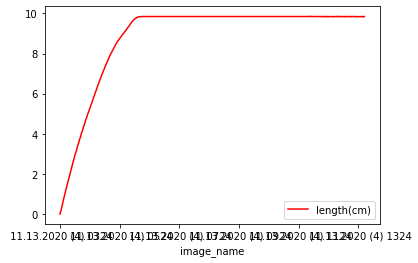

In [43]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()